In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
mc_pion = pd.read_csv("AcquMC_proton_Pion_Photon1_300MeV_10000.txt")
mc_compton = pd.read_csv("AcquMC_proton_Compton_300MeV_10000.txt")


In [24]:
mc_compton.head()

,E_beam,E_gamma,theta_gamma,phi_gamma,E_p,theta_p,phi_p,id
0,300.162,240.887,76.657,164.772,59.268,43.781,-15.227,1
1,300.943,195.736,132.433,64.125,105.198,18.501,-115.834,1
2,300.483,213.961,105.158,19.144,86.514,30.134,-160.783,1
3,300.741,281.303,38.347,73.952,19.430,65.331,-106.027,1
4,300.737,285.927,32.972,-68.435,14.802,68.676,111.512,1


In [25]:
mc_pion.head()

,E_beam,E_gamma,theta_gamma,phi_gamma,E_p,theta_p,phi_p,id
0,300.162,167.763,70.553,142.487,51.350,39.658,-15.227,2
1,300.943,84.901,28.395,163.235,7.228,59.087,-139.509,2
2,300.483,222.917,39.872,94.793,17.197,55.815,-105.995,2
3,300.741,137.007,26.578,167.090,13.385,57.510,-74.796,2
4,300.737,165.230,23.349,57.112,25.109,52.291,-111.577,2


In [26]:
mc_sum = mc_compton.append(mc_pion, ignore_index=True)
mc_sum.head()
mc_sum.drop(["E_beam"], axis = 1, inplace = True)
mc_sum.drop(["phi_gamma"], axis = 1, inplace = True)
mc_sum.drop(["phi_p"], axis = 1, inplace = True)

C:\Users\Khach\AppData\Local\Temp\ipykernel_7188\2115985275.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mc_sum = mc_compton.append(mc_pion, ignore_index=True)


In [27]:
mc_sum_reshuffle2 = mc_sum.sample(frac = 1).reset_index()
mc_sum_reshuffle2.drop("index", axis =1, inplace = True)

In [28]:
mc_sum_reshuffle2.head(30)

,E_gamma,theta_gamma,E_p,theta_p,id
0,226.986,90.955,73.979,36.656,1
1,245.857,72.029,54.441,46.195,1
2,37.819,128.138,43.578,43.449,2
3,197.362,129.274,103.228,19.736,1
4,253.686,64.918,46.860,49.995,1
5,100.120,43.136,13.804,57.373,2
6,295.700,18.947,5.106,77.558,1
7,189.992,145.085,110.852,13.380,1
8,231.418,85.890,68.741,39.155,1
9,143.667,38.692,14.214,57.157,2


In [29]:
mc_sum_reshuffle2.head()

,E_gamma,theta_gamma,E_p,theta_p,id
0,226.986,90.955,73.979,36.656,1
1,245.857,72.029,54.441,46.195,1
2,37.819,128.138,43.578,43.449,2
3,197.362,129.274,103.228,19.736,1
4,253.686,64.918,46.860,49.995,1


In [30]:
mc_sum_reshuffle2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      20000 non-null  float64
 1   theta_gamma  20000 non-null  float64
 2   E_p          20000 non-null  float64
 3   theta_p      19998 non-null  float64
 4   id           20000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 781.4 KB


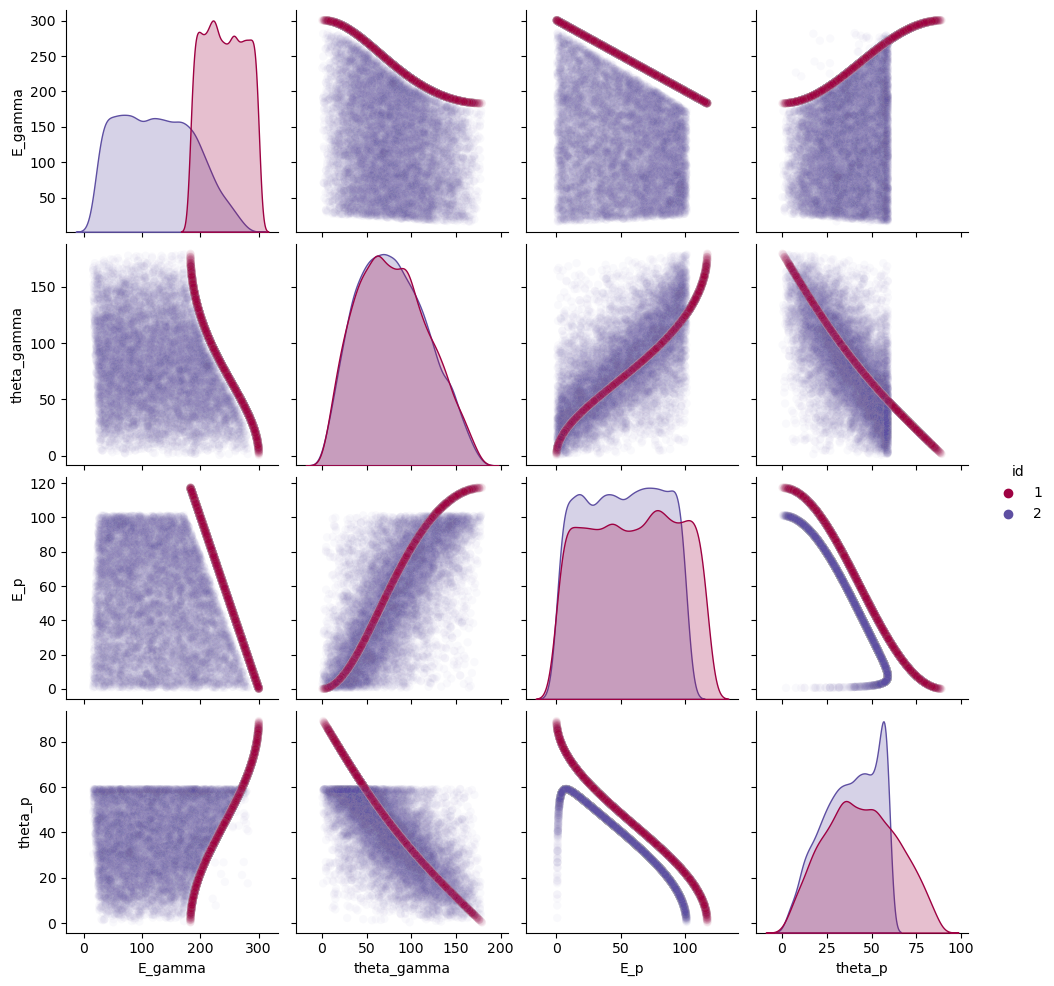

In [17]:
sns.pairplot(mc_sum_reshuffle2, hue = "id",  kind='scatter', plot_kws={'alpha':0.03}, palette='Spectral')

<AxesSubplot:>

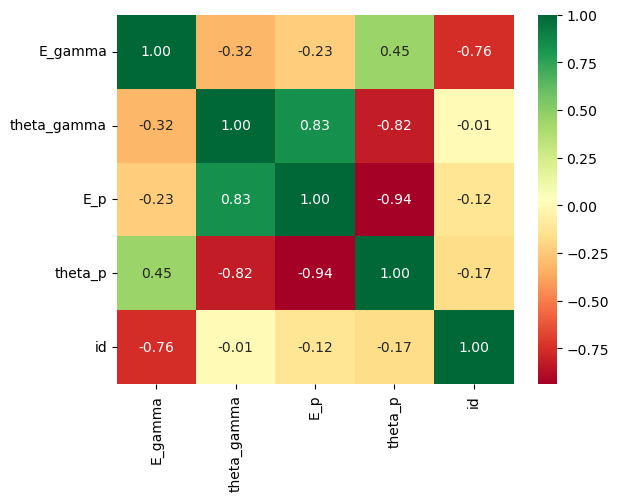

In [11]:
sns.heatmap(mc_sum_reshuffle2.corr(), annot = True, fmt='.2f', cmap='RdYlGn')

In [31]:
mc_sum_reshuffle3 = mc_sum_reshuffle2[np.isfinite(mc_sum_reshuffle2).all(1)]


In [32]:
from sklearn.model_selection import train_test_split
#X = mc_pion[['E_gamma', 'theta_gamma', 'E_p', 'theta_p']]
#y = mc_pion['id']
X = mc_sum_reshuffle3[['E_gamma', 'theta_gamma', 'E_p', 'theta_p']]
y = mc_sum_reshuffle3['id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
mc_sum_reshuffle3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   E_gamma      19998 non-null  float64
 1   theta_gamma  19998 non-null  float64
 2   E_p          19998 non-null  float64
 3   theta_p      19998 non-null  float64
 4   id           19998 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 937.4 KB


In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3287
           2       1.00      1.00      1.00      3313

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [37]:
print(confusion_matrix(y_test,predictions))

[[3287    0]
 [   0 3313]]


In [41]:
predictions

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

In [42]:
y_test

16523    2
4308     2
3354     2
7039     1
8289     1
        ..
611      1
13637    2
11617    2
7069     1
19991    1
Name: id, Length: 6600, dtype: int64